In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
grid_size = 3
states = [(i, j) for i in range(grid_size) for j in range(grid_size)]
actions = ['left', 'right', 'up', 'down']

In [3]:
rewards = {
    (0, 0): -1, (0, 1): -1, (0, 2): -1,
    (1, 0): -1, (1, 1): -10, (1, 2): -1,
    (2, 0): -1, (2, 1): -1, (2, 2): 100
}

In [4]:
def get_next_state(state, action):
    i, j = state
    if action == 'left':
        return (i, max(j - 1, 0))
    elif action == 'right':
        return (i, min(j + 1, grid_size - 1))
    elif action == 'up':
        return (max(i - 1, 0), j)
    elif action == 'down':
        return (min(i + 1, grid_size - 1), j)

In [5]:
def is_terminal(state):
    return state == (2, 2)

In [6]:
Q = {(s, a): 0 for s in states for a in actions}
alpha = 0.1
gamma = 0.9
epsilon = 0.2
num_episodes = 500
cost_history = []

In [7]:
for episode in range(num_episodes):
    state = (0, 0)
    total_cost = 0

    while not is_terminal(state):
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = max(actions, key=lambda a: Q[(state, a)])

        next_state = get_next_state(state, action)
        reward = rewards.get(next_state, -1)
        total_cost += reward
        max_next_q = max(Q[(next_state, a)] for a in actions)
        Q[(state, action)] += alpha * (reward + gamma * max_next_q - Q[(state, action)])
        state = next_state

    cost_history.append(total_cost)
    print(f"Episode {episode+1} - Total Cost: {total_cost}")
    for s in states:
        print(f"State {s}: " + ", ".join([f"{a}: {Q[(s, a)]:.2f}" for a in actions]))
    print("-" * 50)

Episode 1 - Total Cost: 34
State (0, 0): left: -0.20, right: -0.20, up: -0.20, down: -0.28
State (0, 1): left: -0.20, right: -0.10, up: -0.10, down: -1.00
State (0, 2): left: -0.10, right: 0.00, up: -0.10, down: 0.00
State (1, 0): left: -0.20, right: -1.00, up: -0.22, down: -0.29
State (1, 1): left: -0.10, right: 0.00, up: -0.10, down: -0.10
State (1, 2): left: 0.00, right: 0.00, up: 0.00, down: 0.00
State (2, 0): left: -0.20, right: -0.27, up: -0.22, down: -0.20
State (2, 1): left: -0.20, right: 10.00, up: -1.00, down: 0.00
State (2, 2): left: 0.00, right: 0.00, up: 0.00, down: 0.00
--------------------------------------------------
Episode 2 - Total Cost: 52
State (0, 0): left: -0.39, right: -0.45, up: -0.39, down: -0.38
State (0, 1): left: -0.31, right: -0.28, up: -0.20, down: -1.90
State (0, 2): left: -0.21, right: -0.20, up: -0.10, down: -0.10
State (1, 0): left: -0.39, right: -1.00, up: -0.41, down: -0.38
State (1, 1): left: -0.21, right: -0.10, up: -0.10, down: -0.10
State (1, 2

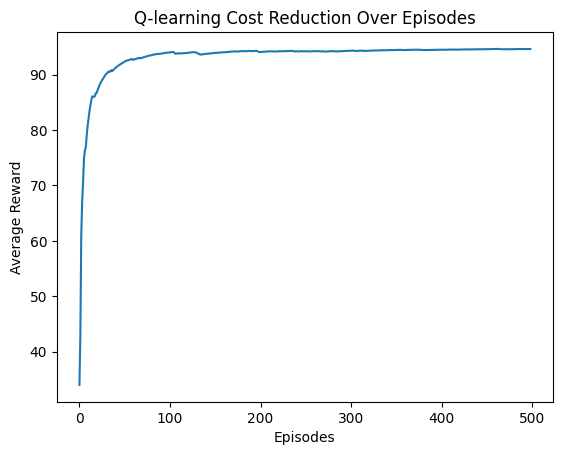

In [8]:
total_rewards_over_time = [sum(cost_history[:i]) / i for i in range(1, len(cost_history))]
plt.plot(total_rewards_over_time)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Q-learning Cost Reduction Over Episodes')
plt.show()